In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from NeuralNetwork import *
# pip install keras                       
from keras.datasets import mnist

In [2]:
def ConvertData(Y):
    Y_=[]
    for i in range(len(Y)):
        A=np.zeros((10))
        A[Y[i]]=1.0
        Y_+=[A]
    return np.array(Y_).T

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

X1=train_X.reshape(60000,28*28).T/255
Y1=ConvertData(train_Y)

In [3]:
def logarithmic_interval(start,end,steps): # 10^-start,....,10^-end
    steps_arr=[i*(end-start)/steps for i in range(steps+1)]
    interval=[10**start*10**steps_arr[i] for i in range(steps+1)]
    return interval
    

In [4]:
interval=logarithmic_interval(-3,-1,5)

In [7]:
NN=NeuralNetwork(28*28,10)
NN.AddLayer(Plain(28*28,40,Sigmoid))
NN.AddLayer(Plain(40,20,Sigmoid))
NN.AddLayer(Plain(20,10,Sigmoid))

def train(method,interval):
    losses=[]
    for i in interval:
        Initializer.SetGenerator(123)
        NN.Init()
        NN.Train(X1,Y1,10,10,method(i))
        losses+=[NN.loss]
    return losses

In [8]:
losses=train(Stochastic,interval)
for i,loss in enumerate(losses):
    plt.plot(loss,label=str(interval[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

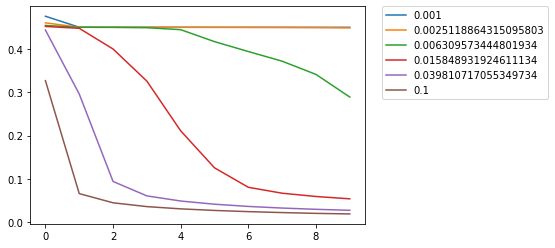

In [ ]:
losses=train(Momentum,interval)
for i,loss in enumerate(losses):
    plt.plot(loss,label=str(interval[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)